In [52]:
from plotnine import *
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt

In [56]:
def rmse(real,pred):
    return(np.sqrt(mean_squared_error(pred,real)).round(3))

In [10]:
weighted_mean=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/weigthed_mean_output.csv')

In [11]:
mean_rf=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/mean_rf_output.csv')

In [49]:
data=weighted_mean.merge(mean_rf,how='outer')

In [59]:
data=data[data['Real'].notna()]

In [60]:
data

,eqtl_id,Weighted Means Prediction,Real,Mean Prediction,RF Prediction
0,chr1_169796199_G_A.ENSG00000000457,-0.016986,-0.008613,-0.058022,NaN
1,chr1_169845687_C_CTTCCA.ENSG00000000457,-0.031649,-0.029992,-0.051330,NaN
2,chr1_169821020_T_G.ENSG00000000457,-0.033530,-0.033779,-0.045330,NaN
3,chr1_169982267_A_T.ENSG00000000457,0.010104,0.001508,0.047456,NaN
4,chr1_169787407_G_C.ENSG00000000457,-0.031554,-0.033725,-0.050296,NaN
...,...,...,...,...,...
4610,chr1_153923736_A_G.ENSG00000284738,NaN,-0.053094,0.067361,-0.053603
4611,chr1_235343538_G_A.ENSG00000285177,NaN,0.012283,0.025434,NaN
4612,chr1_1098863_C_T.ENSG00000285812,NaN,-0.116695,-0.135406,NaN
4613,chr1_25044586_C_G.ENSG00000285823,NaN,-0.002140,0.207325,NaN


In [51]:
plot_data=data.melt(id_vars=['eqtl_id','Real'],value_vars=['Weighted Means Prediction','Mean Prediction','RF Prediction'],value_name='Real value')

In [102]:
plot_data

,eqtl_id,Real,variable,Real value
0,chr1_169796199_G_A.ENSG00000000457,-0.008613,Weighted Means Prediction,-0.016986
1,chr1_169845687_C_CTTCCA.ENSG00000000457,-0.029992,Weighted Means Prediction,-0.031649
2,chr1_169821020_T_G.ENSG00000000457,-0.033779,Weighted Means Prediction,-0.033530
3,chr1_169982267_A_T.ENSG00000000457,0.001508,Weighted Means Prediction,0.010104
4,chr1_169787407_G_C.ENSG00000000457,-0.033725,Weighted Means Prediction,-0.031554
...,...,...,...,...
14833,chr1_177969302_G_A.ENSG00000120341,NaN,RF Prediction,0.039001
14834,chr1_149629603_G_A.ENSG00000275557,NaN,RF Prediction,-0.021490
14835,chr1_18480845_T_C.ENSG00000179023,NaN,RF Prediction,0.016658
14836,chr1_146393136_TC_T.ENSG00000162825,NaN,RF Prediction,0.002447


/homes/jhidalgo/.local/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 880 rows containing missing values.
/homes/jhidalgo/.local/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 893 rows containing missing values.
/homes/jhidalgo/.local/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 3733 rows containing missing values.


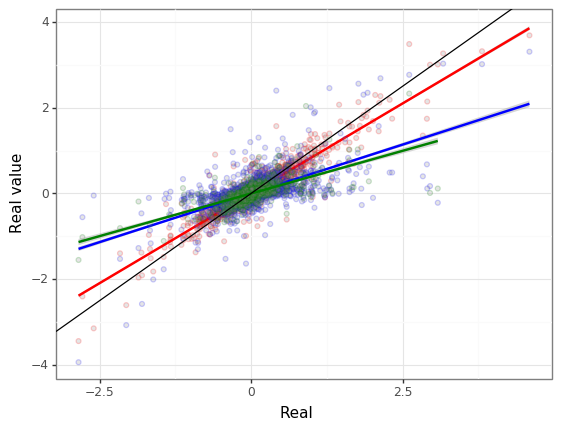

<ggplot: (2964884939704)>

In [47]:
weighted_data=plot_data[plot_data['variable']=='Weighted Means Prediction']
mean_data=plot_data[plot_data['variable']=='Mean Prediction']
rf_data=plot_data[plot_data['variable']=='RF Prediction']

((

    ggplot(plot_data,aes(x='Real',y='Real value'))
    +geom_point(data=weighted_data,colour='red',fill='grey',alpha=0.2)
    +geom_smooth(data=weighted_data,colour='red')
    +geom_point(data=mean_data,colour='blue',fill='grey',alpha=0.2)
    +geom_smooth(data=mean_data,colour='blue')
    +geom_point(data=rf_data,colour='green',fill='grey',alpha=0.2)
    +geom_smooth(data=rf_data,colour='green')
    +geom_abline()
    +theme_bw()

))

/homes/jhidalgo/.local/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 880 rows containing missing values.
/homes/jhidalgo/.local/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 893 rows containing missing values.
/homes/jhidalgo/.local/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 3733 rows containing missing values.


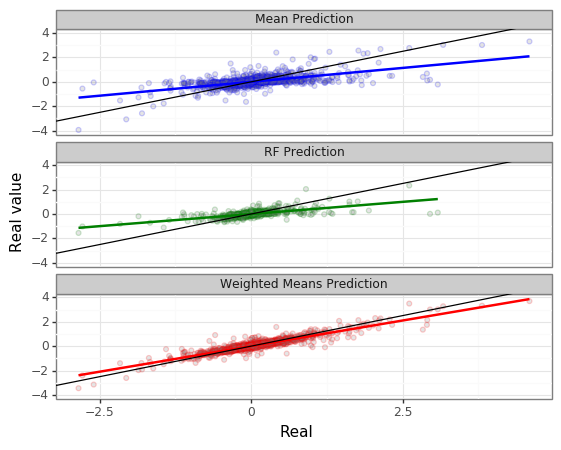

<ggplot: (2964897727371)>

In [136]:
weighted_data=plot_data[plot_data['variable']=='Weighted Means Prediction']
mean_data=plot_data[plot_data['variable']=='Mean Prediction']
rf_data=plot_data[plot_data['variable']=='RF Prediction']

((

    ggplot(plot_data,aes(x='Real',y='Real value'))
    +geom_point(data=weighted_data,colour='red',fill='grey',alpha=0.2)
    +geom_smooth(data=weighted_data,colour='red')
    +geom_point(data=mean_data,colour='blue',fill='grey',alpha=0.2)
    +geom_smooth(data=mean_data,colour='blue')
    +geom_point(data=rf_data,colour='green',fill='grey',alpha=0.2)
    +geom_smooth(data=rf_data,colour='green')
    +geom_abline()
    +theme_bw()
    +facet_wrap('variable',ncol=1)
))

In [137]:
plot_data2=pd.DataFrame(columns=['RMSE','Pearson Correlation'],index=[data.columns[[1,3,4]]])
for i in data.columns[[1,3,4]]:
     plot_data2['RMSE'].loc[i]=rmse(data[[i,'Real']].dropna()[i],data[[i,'Real']].dropna()['Real'])
     plot_data2['Pearson Correlation'].loc[i]=data[i].corr(data['Real'])

In [138]:
plot_data2=plot_data2.astype(float)#.reset_index().rename(columns={'level_0':'Model'})

In [139]:
plot_data2

,RMSE,Pearson Correlation
Weighted Means Prediction,0.136,0.930239
Mean Prediction,0.288,0.626801
RF Prediction,0.276,0.663858
